In [18]:
import pandas as pd         # For data handling
import numpy as np          # For numerical operations
import seaborn as sns       # For visualizations
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib

In [19]:
from ucimlrepo import fetch_ucirepo 
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 
# metadata 
print(breast_cancer_wisconsin_diagnostic.metadata) 
# variable information 
print(breast_cancer_wisconsin_diagnostic.variables) 

{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

Dataset saved to breast_cancer_data.csv
   radius1  texture1  perimeter1   area1  smoothness1  compactness1  \
0    17.99     10.38      122.80  1001.0      0.11840       0.27760   
1    20.57     17.77      132.90  1326.0      0.08474       0.07864   
2    19.69     21.25      130.00  1203.0      0.10960       0.15990   
3    11.42     20.38       77.58   386.1      0.14250       0.28390   
4    20.29     14.34      135.10  1297.0      0.10030       0.13280   

   concavity1  concave_points1  symmetry1  fractal_dimension1  ...  texture3  \
0      0.3001          0.14710     0.2419             0.07871  ...     17.33   
1      0.0869          0.07017     0.1812             0.05667  ...     23.41   
2      0.1974          0.12790     0.2069             0.05999  ...     25.53   
3      0.2414          0.10520     0.2597             0.09744  ...     26.50   
4      0.1980          0.10430     0.1809             0.05883  ...     16.67   

   perimeter3   area3  smoothness3  compactness3  co

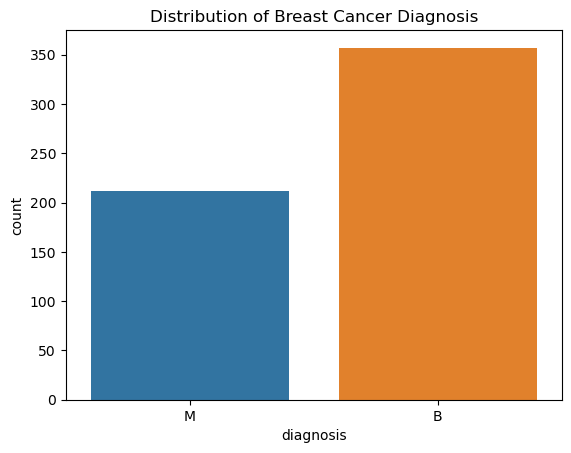

In [20]:
# Convert feature and target data to a single DataFrame
data = X.copy()  # Copy feature data
data['diagnosis'] = y  # Add target data as a new column

# Save to CSV
data.to_csv("breast_cancer_data.csv", index=False)

print("Dataset saved to breast_cancer_data.csv")

# Load the CSV file into a pandas DataFrame
data = pd.read_csv("breast_cancer_data.csv")

# Check the first few rows
print(data.head())

# Basic info about data types, null values, and data shape
print(data.info())
print(data.describe())

# Visualize the class distribution
sns.countplot(x='diagnosis', data=data)
plt.title('Distribution of Breast Cancer Diagnosis')
plt.show()


In [21]:
# Handle missing values
data = data.dropna()

# Encode target variable
label_encoder = LabelEncoder()
data['diagnosis'] = label_encoder.fit_transform(data['diagnosis'])

# Separate features and target
X = data.drop(['diagnosis'], axis=1)  # Features
y = data['diagnosis']                 # Target variable

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [22]:
# Split data into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [23]:
# Initialize and train Logistic Regression model
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

# Predict on test set
y_pred_lr = model_lr.predict(X_test)

# Evaluate accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr}")


Logistic Regression Accuracy: 0.9736842105263158


In [24]:
# Initialize and train Random Forest model
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Predict on test set
y_pred_rf = model_rf.predict(X_test)

# Evaluate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")


Random Forest Accuracy: 0.9649122807017544


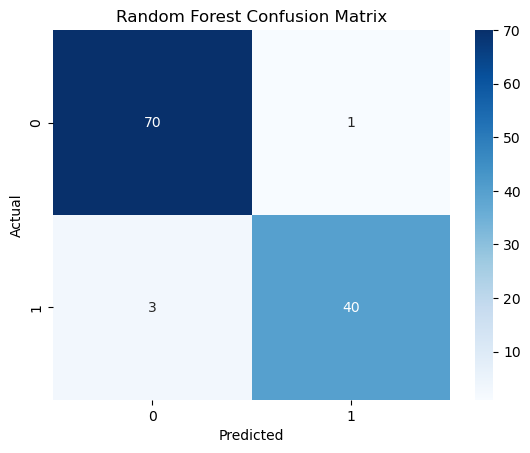

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [25]:
# Confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report for Random Forest
print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))


In [26]:
# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20]
}

grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model and evaluate
best_model_rf = grid_search.best_estimator_
y_pred_best_rf = best_model_rf.predict(X_test)
print("Best Random Forest Model Accuracy:", accuracy_score(y_test, y_pred_best_rf))


Best Random Forest Model Accuracy: 0.9649122807017544


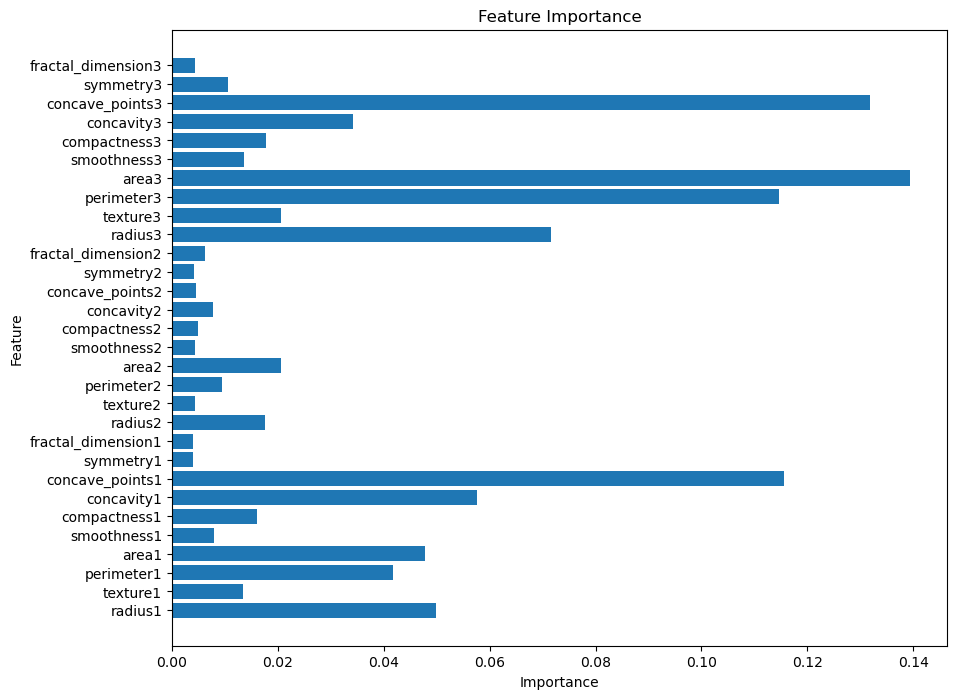

In [27]:
# Plot feature importance for the best Random Forest model
importances = best_model_rf.feature_importances_
feature_names = X.columns
plt.figure(figsize=(10, 8))
plt.barh(feature_names, importances)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


In [ ]:
plt.savefig("diagnosis_distribution.png")

In [29]:
joblib.dump(best_model_rf, "breast_cancer_model.pkl")

['breast_cancer_model.pkl']

In [30]:
data.to_csv('dataset.csv', index=False)